# Table of Contents
1. [Introduction](#Introduction)
2. [Load Dataset](#Load-Dataset)
3. [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
6. [Conclusion](#Conclusion)
7. [Potential Improvements & Next Steps](#Potential-Improvement-&-Next-Steps)


# Wake County Development Analysis #
## Introduction ##
This project aims to explore the growth and development trends in Wake County, Raleigh, North Carolina. By analyzing the county’s development plans, I seek to answer several key questions:

- How has the approval of lots evolved over the years?
- When did the most development activity take place?
- Who are the leading developers in Wake County?
- What types of projects are being built?
- How have subdivision plans changed over time?

In [147]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset ##
Dataset source: https://data.raleighnc.gov/datasets/0cded58c5048437d8da83608818650ba_0/explore?location=35.746571%2C-78.575573%2C10.51

In [152]:
# load dataset
df = pd.read_csv("/Users/anthonyandino/Downloads/Development_Plans.csv")  # Mac/Linux

In [154]:
# number of rows and columns
df.shape

(6463, 24)

In [156]:
# Name of columns
df.columns

Index(['X', 'Y', 'OBJECTID', 'submitted', 'submitted_yr', 'approved',
       'plan_type', 'status', 'appealperiodends', 'updated', 'sunset_date',
       'acreage', 'major_street', 'developer', 'plan_name', 'lots_req',
       'lots_apprv', 'sq_ft_req', 'units_apprv', 'units_req', 'zoning',
       'plan_number', 'GlobalID', 'missing_middle'],
      dtype='object')

In [158]:
df.head()

,X,Y,OBJECTID,submitted,submitted_yr,approved,plan_type,status,appealperiodends,updated,...,plan_name,lots_req,lots_apprv,sq_ft_req,units_apprv,units_req,zoning,plan_number,GlobalID,missing_middle
0,-8.758347e+06,4.287198e+06,35812,2010/06/30 04:00:00+00,2010.0,NaN,SITE PLAN,Review In Progress,NaN,2010/08/25 20:27:24+00,...,QUEST ACADEMY,1.0,0.0,15137.0,0.0,2.0,RR/WPOD,SP-30-2010,518dd86b-cae2-4fc2-a675-0403c10a31c9,NaN
1,-8.748582e+06,4.281723e+06,35814,1999/05/25 04:00:00+00,1999.0,1999/07/06 04:00:00+00,SUBDIVISION,Active,1999/08/05 04:00:00+00,1999/07/06 19:07:00+00,...,NORTH BLVD. NORTH INDUSTRIAL CENTER,2.0,2.0,0.0,0.0,0.0,I-1,S-67-1999,f33517ff-f320-4d8c-a721-fcea24839aed,NaN
2,-8.746610e+06,4.270237e+06,35815,2000/11/15 05:00:00+00,2000.0,2001/01/24 05:00:00+00,SUBDIVISION,Active,2001/02/23 05:00:00+00,2009/03/10 15:58:00+00,...,WALNUT CREEK BUSINESS PARK,3.0,3.0,0.0,0.0,0.0,I-1,S-142-2000,3a629c23-a89b-4b25-bb35-c1720e98f0e2,NaN
3,-8.752564e+06,4.263764e+06,35816,2002/03/04 05:00:00+00,2002.0,2003/05/22 04:00:00+00,SUBDIVISION,Active,2003/06/21 04:00:00+00,2019/05/29 14:44:24+00,...,TRYON PLACE SUBDIVISION,64.0,78.0,0.0,0.0,0.0,"SC,R-10,R-4",S-21-2002,6cdc9f6a-10e9-4804-84b4-b102237cabc4,NaN
4,-8.745206e+06,4.278826e+06,35817,1999/02/09 05:00:00+00,1999.0,1999/04/12 04:00:00+00,SUBDIVISION,Active,1999/05/12 04:00:00+00,2017/02/27 17:58:23+00,...,VALLEY STREAM,297.0,0.0,0.0,0.0,0.0,"R-6, R-10, CM",S-10-1999,14cfa47a-4153-4293-853e-6b58e85afb34,NaN


## Data Cleaning and Preparation ##
In this step:

- Unnecessary columns that were not needed to answer the key questions were removed.
- Object types, such as "status" and "developer," were converted to strings.
- Since this was an entry-level project, I selected only the first 200 rows of data for analysis.
- Missing values that were important for series analysis were removed, and for string columns, missing data was replaced with "unknown" or "no name."

In [160]:
# Remove the following Columns
df.drop(['X', 'Y', 'OBJECTID', 'submitted', 'approved', 'appealperiodends', 
         'updated', 'zoning', 'plan_number', 'GlobalID', 'missing_middle', 'sunset_date', 'units_apprv'], axis = 1, inplace=True, errors='ignore')

In [162]:
df.head()

,submitted_yr,plan_type,status,acreage,major_street,developer,plan_name,lots_req,lots_apprv,sq_ft_req,units_req
0,2010.0,SITE PLAN,Review In Progress,5.12,STRICKLAND RD,WATSON,QUEST ACADEMY,1.0,0.0,15137.0,2.0
1,1999.0,SUBDIVISION,Active,3.14,OAK FOREST DR,"JFW ASSOCIATES, LLC",NORTH BLVD. NORTH INDUSTRIAL CENTER,2.0,2.0,0.0,0.0
2,2000.0,SUBDIVISION,Active,90.36,NEW BERN AVE,DUKE - WEEKS,WALNUT CREEK BUSINESS PARK,3.0,3.0,0.0,0.0
3,2002.0,SUBDIVISION,Active,23.09,GARNER RD,MITEPE DEVELOPMENT LLC,TRYON PLACE SUBDIVISION,64.0,78.0,0.0,0.0
4,1999.0,SUBDIVISION,Active,74.38,VALLEY STREAM DR,HAM DEVELOPMENT LLC,VALLEY STREAM,297.0,0.0,0.0,0.0


In [30]:
# make all columns type string for sake of consistency
df.columns = list(map(str, df.columns))

In [32]:
# Check for all values types
df.dtypes

submitted_yr    float64
plan_type        object
status           object
acreage         float64
major_street     object
developer        object
plan_name        object
lots_req        float64
lots_apprv      float64
sq_ft_req       float64
units_req       float64
dtype: object

In [34]:
# Change all object types to stringer type
df = df.astype({col: "string" for col in df.select_dtypes(include=["object"]).columns})

# Check the data types
df.dtypes

submitted_yr           float64
plan_type       string[python]
status          string[python]
acreage                float64
major_street    string[python]
developer       string[python]
plan_name       string[python]
lots_req               float64
lots_apprv             float64
sq_ft_req              float64
units_req              float64
dtype: object

In [36]:
# Removes leading/trailing spaces
df.columns = df.columns.str.strip()  

In [38]:
# Work with only first 200 rows
# Ensures df_small remains a DataFrame
df_small = df.iloc[:200].copy()  
print('Data Dimensions:', df_small.shape)
print('df_small type', type(df_small))

Data Dimensions: (200, 11)
df_small type <class 'pandas.core.frame.DataFrame'>


In [40]:
# Check for missing values in data set
df_small.isnull().sum()

submitted_yr    1
plan_type       0
status          0
acreage         1
major_street    0
developer       1
plan_name       0
lots_req        1
lots_apprv      1
sq_ft_req       1
units_req       1
dtype: int64

### Handdle missing values: ###
- submitted_yr (1 missing): Drop row due to series trend analysis.
- acreage (1 missing): Drow row
- developer (1 missing): Fill with "Unknown".
- lots_req, lots_apprv, sq_ft_req, units_req (1 missing): drop row

In [167]:
# Drop rows where numerical values are missing
df_small = df_small.dropna(subset=['submitted_yr', 'lots_req', 'acreage', 'sq_ft_req', 'units_req'])

In [169]:
# Fill in for unknown developer and and plan anme
df_small['developer'].fillna("Unknown", inplace=True)
df_small['plan_name'].fillna("No Name", inplace=True)

/var/folders/hn/rprgcb2953d03wtgrh29ytjm0000gn/T/ipykernel_90164/4270825397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_small['developer'].fillna("Unknown", inplace=True)
/var/folders/hn/rprgcb2953d03wtgrh29ytjm0000gn/T/ipykernel_90164/4270825397.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [171]:
# Check there is no more missing values
df_small.isnull().sum()

submitted_yr     0
plan_type        0
status           0
acreage          0
major_street     0
developer        0
plan_name        0
lots_req         0
lots_apprv       0
sq_ft_req        0
units_req        0
status_active    0
dtype: int64

In [173]:
df_small.head()

,submitted_yr,plan_type,status,acreage,major_street,developer,plan_name,lots_req,lots_apprv,sq_ft_req,units_req,status_active
0,2010,SITE PLAN,Review In Progress,5.12,STRICKLAND RD,WATSON,QUEST ACADEMY,1.0,0.0,15137.0,2.0,0
1,1999,SUBDIVISION,Active,3.14,OAK FOREST DR,"JFW ASSOCIATES, LLC",NORTH BLVD. NORTH INDUSTRIAL CENTER,2.0,2.0,0.0,0.0,1
2,2000,SUBDIVISION,Active,90.36,NEW BERN AVE,DUKE - WEEKS,WALNUT CREEK BUSINESS PARK,3.0,3.0,0.0,0.0,1
3,2002,SUBDIVISION,Active,23.09,GARNER RD,MITEPE DEVELOPMENT LLC,TRYON PLACE SUBDIVISION,64.0,78.0,0.0,0.0,1
4,1999,SUBDIVISION,Active,74.38,VALLEY STREAM DR,HAM DEVELOPMENT LLC,VALLEY STREAM,297.0,0.0,0.0,0.0,1


In [175]:
df_small.describe()

,submitted_yr,acreage,lots_req,lots_apprv,sq_ft_req,units_req,status_active
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1995.723618,14.053166,31.964824,27.854271,7495.221106,3.839196,0.934673
std,6.921566,27.969447,75.034765,71.549262,23287.090838,26.647233,0.247725
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.990000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1996.000000,3.780000,2.000000,2.000000,0.000000,0.000000,1.000000
75%,2000.000000,13.520000,16.500000,11.500000,325.000000,0.000000,1.000000
max,2015.000000,230.900000,463.000000,463.000000,243400.000000,291.000000,1.000000


## Exploratory Data Analysis (EDA) ##

### Total Lots Approved by Year ###
To gain a better understanding of development growth in Wake County over the years, I analyzed the number of lots approved each year and plotted a line graph. This visualization helps to identify any trends and highlight the years with the highest number of approved lots.

In [231]:
# Make sure the year column is an integer (optional, for clarity purposes)
df_small['submitted_yr'] = df_small['submitted_yr'].astype(int)

# Group by year and sum the lots approved
lots_approved_per_year = df_small.groupby('submitted_yr')['lots_apprv'].sum()

# Display the first 5 rows
print(lots_approved_per_year.head())

submitted_yr
1985     560.0
1986     414.0
1987    1543.0
1988     478.0
1989      94.0
Name: lots_apprv, dtype: float64


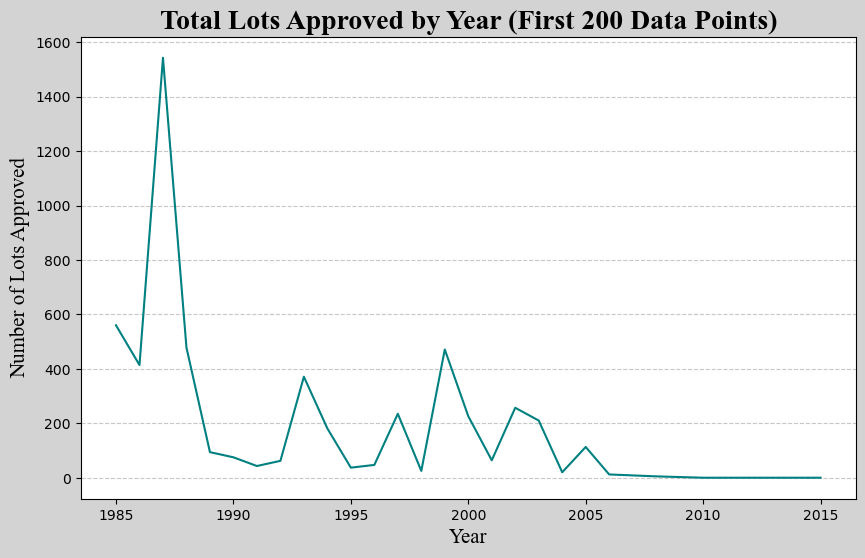

In [233]:
# Plot Line Graph
lots_approved_per_year.plot(kind='line', figsize=(10, 6), color='teal')

# Chart Styling
plt.title('Total Lots Approved by Year (First 200 Data Points)', size = 20, fontname = 'Times New Roman', fontweight= 'bold')
plt.xlabel('Year', size = 15, fontname = 'Times New Roman')
plt.ylabel('Number of Lots Approved', size = 15, fontname = 'Times New Roman')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Apply a grey background to the figure
plt.gcf().set_facecolor('lightgrey')

### Results ###
As shown in the line graph, the number of lots approved peaked around 1987, with over 1,400 lots approved. From 1993 to 2004, there was a slight upward trend, with the number of lots approved barely surpassing 400 before dropping back down to near zero. Additionally, from 2005 to 2015, the number of lots approved appears to be zero. However, it's important to note that this could be due to the limitation of using only the first 200 data points. 

### Development Status by Year ###
As observed earlier, land development followed a clear trend from 1990 to 2006. To explore this trend more deeply, I analyzed the number of development plans that were active versus those that were in progress each year.

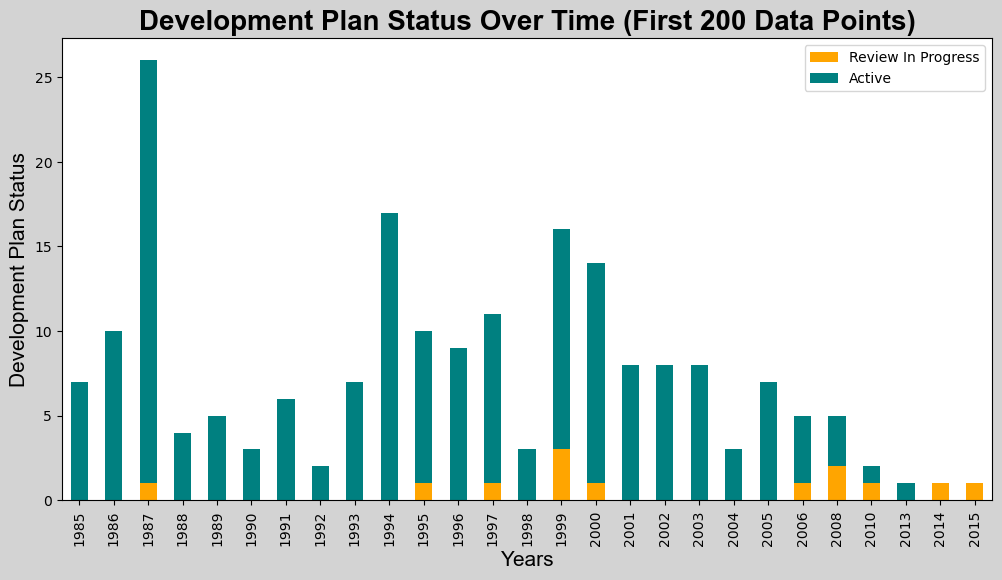

In [237]:
# Create dummy variable: 1 for 'Active', 0 for 'Review In Progress'
df_small['status_active'] = df_small['status'].apply(lambda x: 1 if x == "Active" else 0)

# Group by year and count each status
status_counts = df_small.groupby('submitted_yr')['status_active'].value_counts().unstack()

# Rename columns for clarity
status_counts.columns = ['Review In Progress', 'Active']

#Plot the stacked Bar graph 
status_counts.plot(kind = 'bar', stacked=True, figsize=(12, 6), color=['orange', 'teal'])

# Chart Styling
plt.title('Development Plan Status Over Time (First 200 Data Points)', size = 20, fontname = 'Arial', fontweight = 'bold')
plt.xlabel('Years', size = 15, fontname = 'Arial')
plt.ylabel('Development Plan Status', size = 15, fontname = 'Arial')

# Apply a grey background to the figure
plt.gcf().set_facecolor('lightgrey')

### Results ###
As previously noted, Wake County has experienced land development over the years, though it has slowed down in recent times. The stacked bar graph above shows that, throughout the years, the majority of development plans were active (meaning they were approved). The graph also highlights that the maximum number of development plans occurred in 1987, with 26 plans approved. Additionally, for 2014 and 2015, all plans are marked as "under review."

## Top Developers in Wake County##
While growth is important, understanding who is driving that growth is equally crucial. Therefore, it's essential to gather information about the top developers in Wake County.

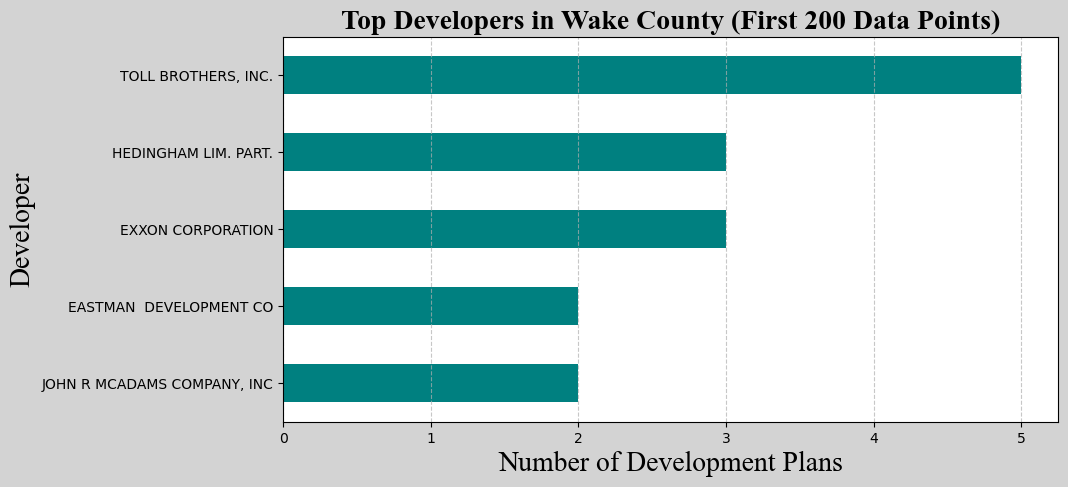

In [241]:
# Count Occurrence of each Developer
developer_counts = df_small['developer'].value_counts()

# Collect top 5 Developers in Wake County
top_developers = developer_counts.head(5)

# Create a gradient of colors from light to dark blue
#colors = plt.cm.Blues(np.linspace(0, 1, len(top_developers)))

# Plot a bar chart of the top developers
top_developers.sort_values(ascending = True).plot(kind = 'barh', figsize = (10,5), color = 'Teal' )

# Chart Styling
plt.title("Top Developers in Wake County (First 200 Data Points)", size = 20, fontname = 'Times New Roman', fontweight = 'bold')
plt.xlabel("Number of Development Plans", size= 20, fontname = 'Times New Roman')
plt.ylabel("Developer", size = 20, fontname = 'Times New Roman') 
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Apply a grey background to the figure
plt.gcf().set_facecolor('lightgrey')

### Results ###
The horizontal bar graph displays the top 5 developers in Wake County, representing various scales: Global, National, and Local.

- Exxon Corporation: An American oil and gas company operating globally, Exxon is the largest investor-owned oil company in the world. (Source:https://corporate.exxonmobil.com/)
- Toll Brothers, Inc.: A publicly traded company (TOL) on the NYSE, Toll Brothers was founded in 1967 in Philadelphia by Bob and Bruce Toll. The company has been named to the Fortune World's Most Admired Companies list for 10 consecutive years. (Source: https://www.tollbrothers.com/about/timeline)
- Eastman Development: A local real estate company specializing in residential and commercial projects. Eastman Development focuses on creating innovative and sustainable properties that enhance the local community. (Source: https://www.mapquest.com/us/north-carolina/eastman-development-288948818)

## Types of Development Plans in Wake County ##
From a personal standpoint, Wake County is an attractive choice for land developers, as it draws interest from companies of all scales. But what exactly is being developed?

In [250]:
# Count number of plans
pivot_table = df_small.groupby('plan_type').size().reset_index(name='count')
print(pivot_table.sort_values(by='count', ascending=False))

                    plan_type  count
8                 SUBDIVISION    104
4               PLAN APPROVAL     39
6                   SITE PLAN     21
1               GROUP HOUSING     12
7                 SPECIAL USE      8
2           MINOR SUBDIVISION      7
5             SHOPPING CENTER      6
0  ADMINISTRATIVE SITE REVIEW      1
3            MOBILE HOME PARK      1


The pivot table shows that the major type of development plan in Wake County over the years has been subdivisions, while the least common has been mobile home parks. 

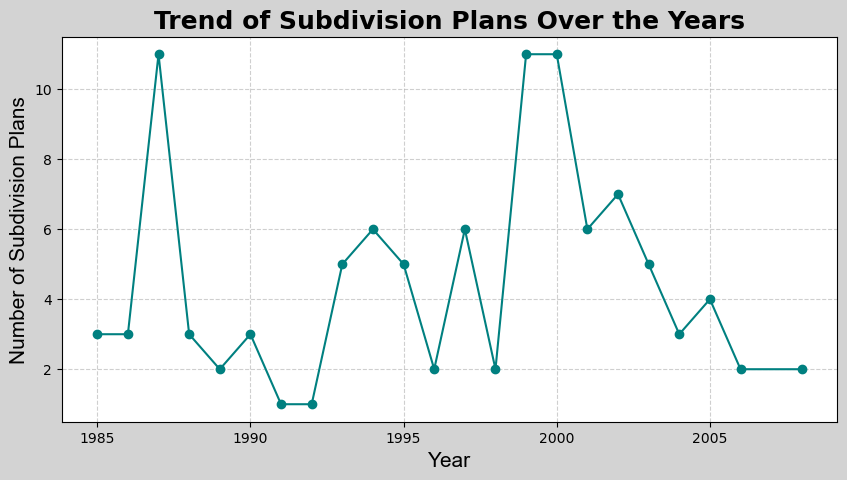

In [253]:
# Filer by Subdivision Plan Only
subdivisions = df_small[df_small['plan_type'] == 'SUBDIVISION']

# Subdivisions per Year
subs_per_year = subdivisions.groupby('submitted_yr').size()

# Plot the subdivisions
plt.figure(figsize=(10, 5))
plt.plot(subs_per_year.index, subs_per_year.values, marker='o', linestyle='-', color='Teal')

# Chart Styling
plt.title("Trend of Subdivision Plans Over the Years", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=15, fontname = 'Arial')
plt.ylabel("Number of Subdivision Plans", fontsize=15, fontname = 'Arial')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gcf().set_facecolor('lightgrey')


### Results ###
Comparing the line graph above with the previous development plan status, it is clear that subdivision plans have been a main priority for land development in Wake County. For example, in 1987, almost half of the total development plans were dedicated to subdivisions. Additionally, in 1999 and 2000, subdivision plans accounted for more than 50% of the total land development plans.

##  Conclusion ##
In conclusion, Wake County has experienced significant land development over the years, with trends reflecting both growth and shifts in priorities. The number of lots approved peaked in 1987, and while development activity slowed in the following decades, it has remained an ongoing trend. Subdivision plans, in particular, have been the primary focus of land development, especially between 1990 and 2006, when most development plans were active. The top developers in the county span various scales, from global companies like Exxon Corporation to local businesses like Eastman Development, illustrating Wake County’s appeal to both large-scale and community-focused development efforts.

Despite a slowdown in development from 2005 to 2015, likely due to data limitations, the dominance of subdivisions remains evident. With almost half of the total development plans in 1987 dedicated to subdivisions and more than 50% of plans in 1999 and 2000, it's clear that this type of development continues to shape the county’s growth. As Wake County moves forward, understanding the trends and key players in land development will be essential for both policymakers and future developers.

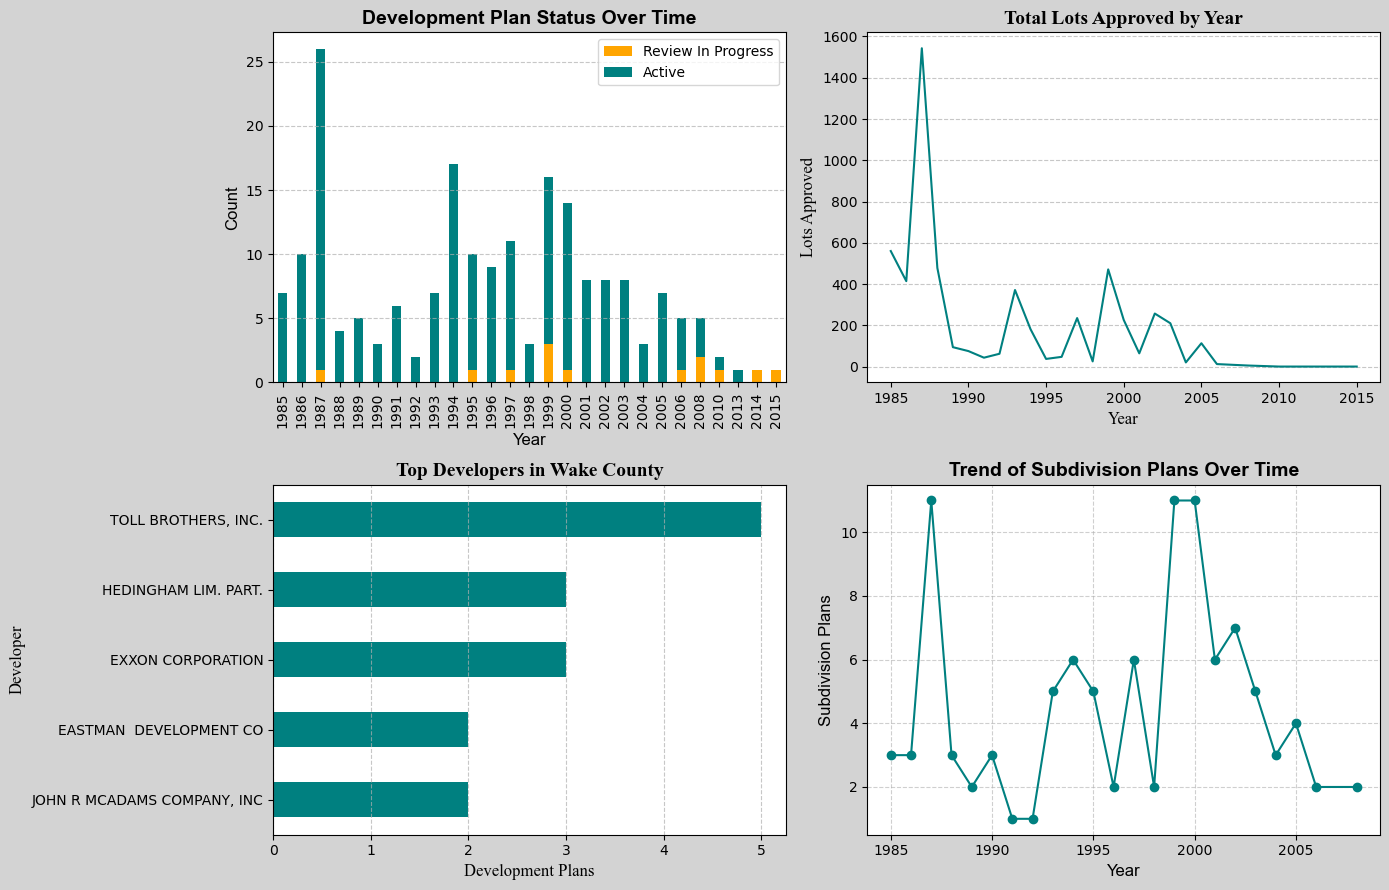

In [258]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
fig.patch.set_facecolor('lightgrey')  # Set grey background for the entire figure

## 📊 1. Stacked Bar Graph: Development Plan Status Over Time
df_small['status_active'] = df_small['status'].apply(lambda x: 1 if x == "Active" else 0)
status_counts = df_small.groupby('submitted_yr')['status_active'].value_counts().unstack()
status_counts.columns = ['Review In Progress', 'Active']
status_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], color=['orange', 'teal'])

axes[0, 0].set_title('Development Plan Status Over Time', fontsize=14, fontweight='bold', fontname='Arial')
axes[0, 0].set_xlabel('Year', fontsize=12, fontname='Arial')
axes[0, 0].set_ylabel('Count', fontsize=12, fontname='Arial')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

## 📈 2. Line Graph: Lots Approved Over Time
lots_approved_per_year.plot(kind='line', ax=axes[0, 1], color='teal')

axes[0, 1].set_title('Total Lots Approved by Year', fontsize=14, fontweight='bold', fontname='Times New Roman')
axes[0, 1].set_xlabel('Year', fontsize=12, fontname='Times New Roman')
axes[0, 1].set_ylabel('Lots Approved', fontsize=12, fontname='Times New Roman')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

## 🏗 3. Horizontal Bar Graph: Top Developers in Wake County
top_developers = df_small['developer'].value_counts().head(5)
top_developers.sort_values(ascending=True).plot(kind='barh', ax=axes[1, 0], color='teal')

axes[1, 0].set_title('Top Developers in Wake County', fontsize=14, fontweight='bold', fontname='Times New Roman')
axes[1, 0].set_xlabel('Development Plans', fontsize=12, fontname='Times New Roman')
axes[1, 0].set_ylabel('Developer', fontsize=12, fontname='Times New Roman')
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)

## 🏘️ 4. Line Graph: Subdivision Plans Over Time
subdivisions = df_small[df_small['plan_type'] == 'SUBDIVISION']
subs_per_year = subdivisions.groupby('submitted_yr').size()

axes[1, 1].plot(subs_per_year.index, subs_per_year.values, marker='o', linestyle='-', color='teal')

axes[1, 1].set_title('Trend of Subdivision Plans Over Time', fontsize=14, fontweight='bold', fontname='Arial')
axes[1, 1].set_xlabel('Year', fontsize=12, fontname='Arial')
axes[1, 1].set_ylabel('Subdivision Plans', fontsize=12, fontname='Arial')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Potential Improvement & Next Steps ##
For potential improvements, I plan to expand the project by utilizing the full dataset initially provided, which contains over 6,000 data points. Including additional variables would allow for more comprehensive analysis and enable predictive statistics on acreage and lots approved. Another valuable step would be to gather the locations of these development plans and map them within Wake County. This would provide a clearer visual representation of where major development is taking place, offering a better understanding of regional growth patterns.